In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
import glob
%matplotlib inline
sns.set(context='paper', style='whitegrid',
        palette='tab10', font='sans-serif',
        font_scale=1.8, color_codes=True,
        rc={'figure.figsize':(16,8)})

In [2]:
def plot_LR(dp, lim, ylim, side, age='0-70', pt=True, save=False):

    min_, max_ = dp['0.2']['lr'].min(), dp['0.2']['lr'].max()
    max_ = int(math.log10(max_)) + 1
    opt = 'RMS'

    f, ax = plt.subplots()

    sns.lineplot(x='lr', y='loss', data=dp['0.2'].iloc[10:], label='0.2')
    sns.lineplot(x='lr', y='loss', data=dp['0.3'].iloc[10:], label='0.3')
    sns.lineplot(x='lr', y='loss', data=dp['0.4'].iloc[10:], label='0.4')
    sns.lineplot(x='lr', y='loss', data=dp['0.5'].iloc[10:], label='0.5')
    sns.lineplot(x='lr', y='loss', data=dp['0.6'].iloc[10:], label='0.6')

    ax.set_xscale("log", basex=10)
    ax.set_xlim(10**-9.9999,10**max_)
    ax.set_ylim(ylim)

    if pt:
        ax.set(xlabel='Taxa de aprendizado (escala log)', ylabel='Função de perda')
    else:
        ax.set(xlabel='Learning rate (log scale)', ylabel='Loss')
    ax.axvline(10**(lim[opt][0]), 0, 130, color='red', linestyle='--')
    ax.axvline(10**(lim[opt][1]), 0, 130, color='red', linestyle='--')

    plt.xticks([10**x for x in range(-10, max_)])
    plt.tight_layout()

    legend = plt.legend(title="Dropout Rate",
                        loc='upper right',
                        fancybox=True)

    name = "LR_finder_"+side+"(10**"+str(lim[opt][0])+".**"+str(lim[opt][1])+")_"+opt+"_" + age
    print(name)
    if save:
        if pt:
            f.savefig(name+".png")
        else:
            f.savefig(name+"_us.png")

In [3]:
def get_files(day, side):
    data = {}
    for dt in glob.glob('../outputs/lr_finder/lr_finder_' + day + "_age_*_RMS_" + side + "*"):
        dp = dt.split("dp")[-1].split(".csv")[0]
        data[dp] = pd.read_csv(dt)
    return data

ipykernel_launcher:15: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
LR_finder_L(10**-4.3.**-4.1)_RMS_0-70
ipykernel_launcher:15: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
LR_finder_R(10**-4.3.**-4.1)_RMS_0-70


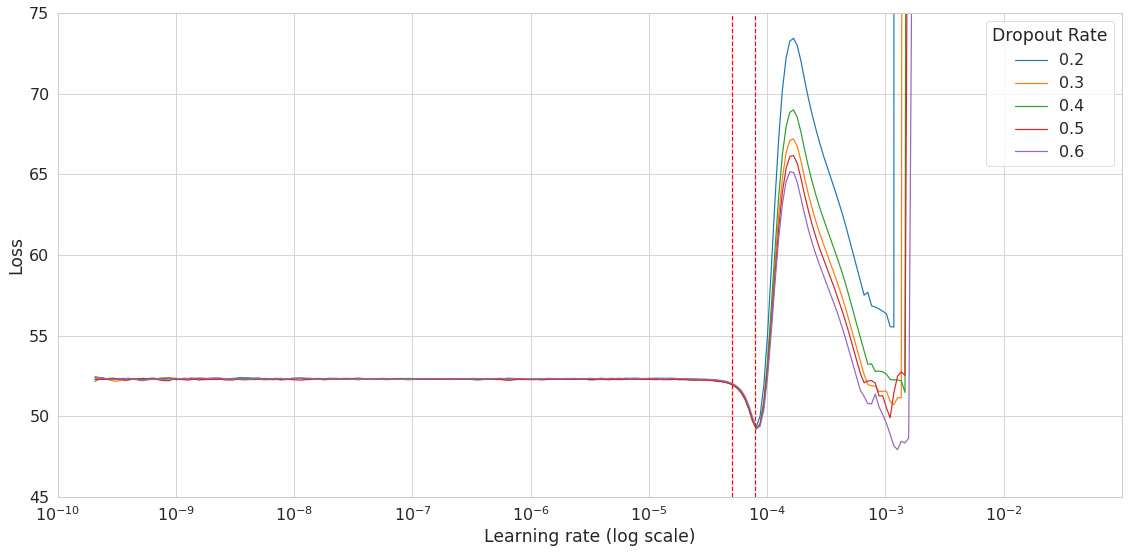

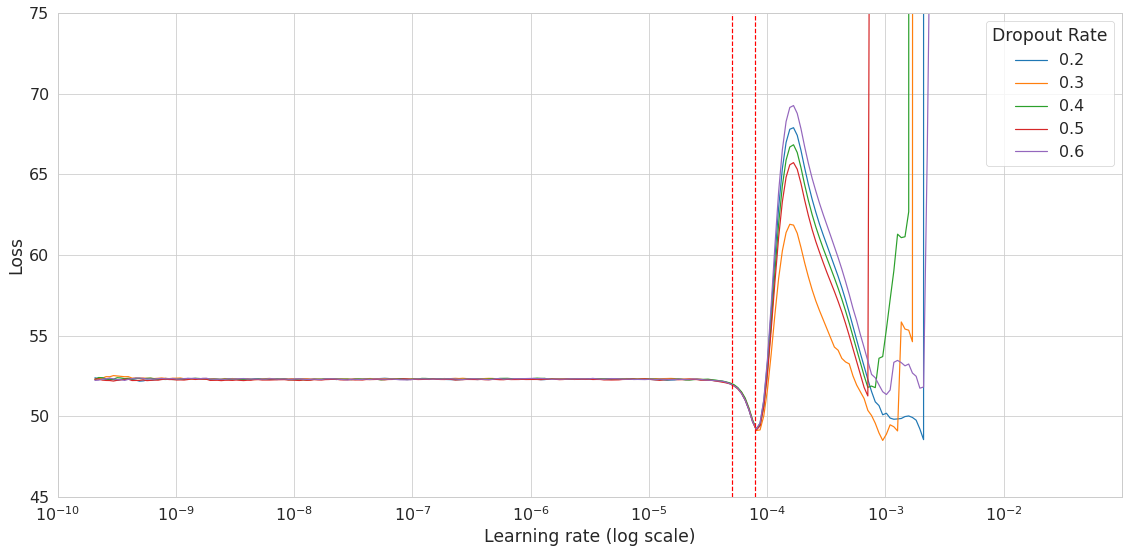

In [12]:
# 0-70
lim = {'RMS': [-4.3,-4.1]}
data = get_files('06-05-2021', 'L')
plot_LR(data, lim, [45, 75], 'L', age='0-70',pt=False, save=True)
# 0-70
lim = {'RMS': [-4.3,-4.1]}
data = get_files('06-05-2021', 'R')
plot_LR(data, lim, [45, 75], 'R', age='0-70',pt=False, save=True)
# data

/home/kpoloni/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  from ipykernel import kernelapp as app
LR_finder_L(10**-6.**-3)_RMS_70-100
/home/kpoloni/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  from ipykernel import kernelapp as app
LR_finder_R(10**-6.**-3)_RMS_70-100


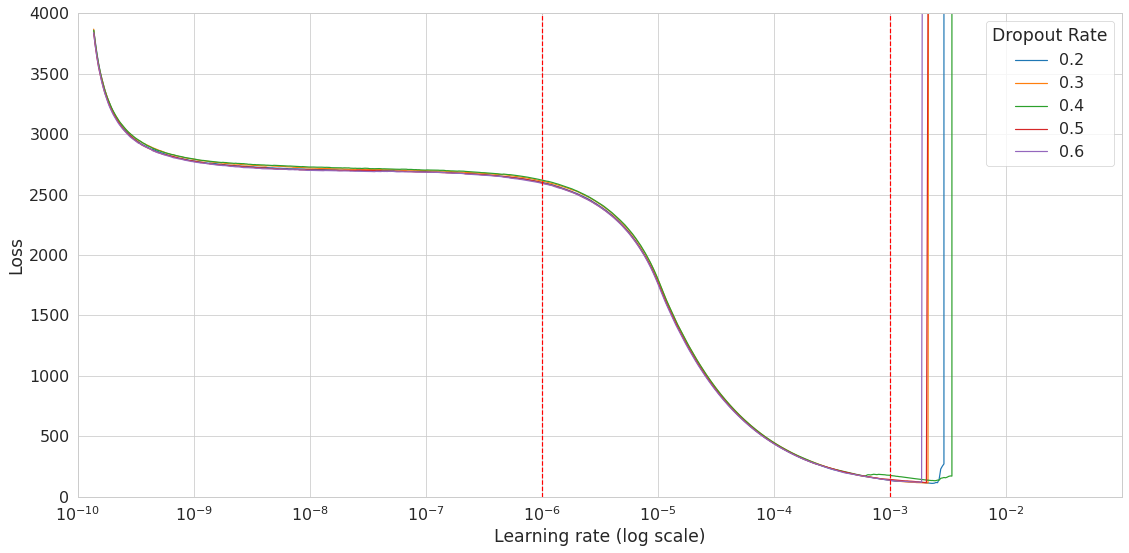

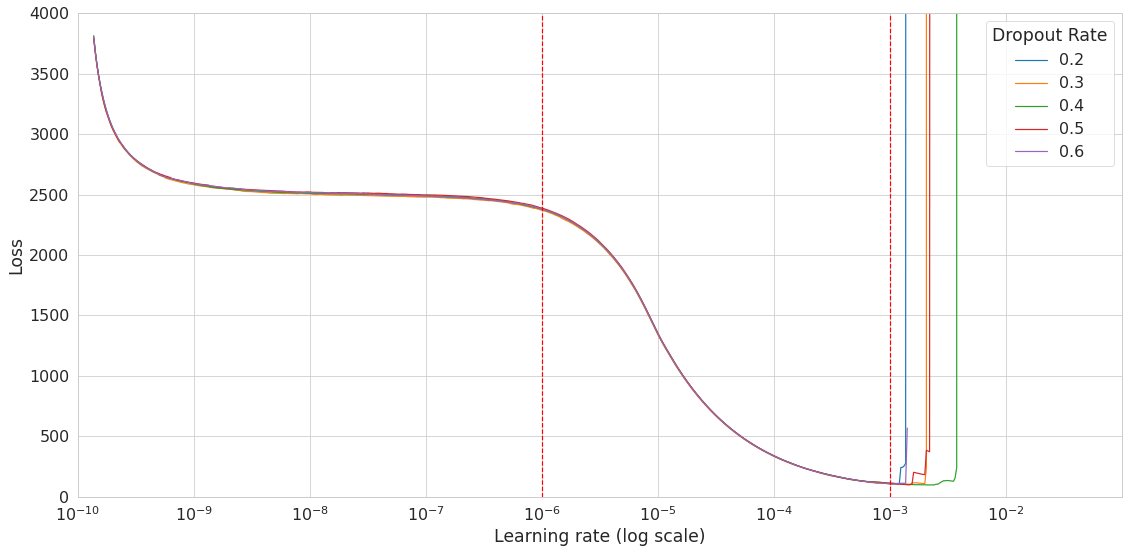

In [9]:
# 70-100
lim = {'RMS': [-6,-3]}
data = get_files('01-05-2021', 'L')
plot_LR(data, lim, [0, 4000], 'L', age='70-100',pt=False, save=False)
# 70-100
lim = {'RMS': [-6,-3]}
data = get_files('01-05-2021', 'R')
plot_LR(data, lim, [0, 4000], 'R', age='70-100',pt=False, save=True)
# data

ipykernel_launcher:15: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
LR_finder_R(10**-4.37.**-4.09)_RMS_0-70


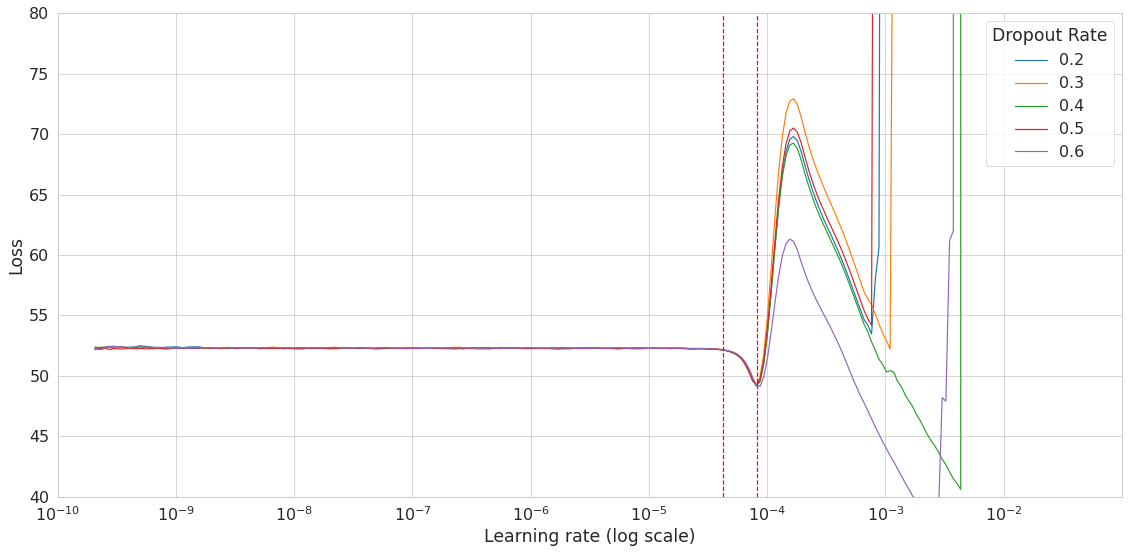

In [5]:
# 0-70
lim = {'RMS': [-4.37,-4.09]}
data = get_files('29-04-2021', 'R')
plot_LR(data, lim, [40, 80], 'R', age='0-70',pt=False, save=False)
# 70-100
lim = {'RMS': [-4.37,-4.09]}
data = get_files('28-04-2021', 'L')
plot_LR(data, lim, [20, 60], 'L', age='70-100',pt=False, save=True)
# data

ipykernel_launcher:15: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
LR_finder_L(10**-4.37.**-4.09)_RMS_0-70
ipykernel_launcher:15: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
LR_finder_L(10**-5.**-4.15)_RMS_70-100


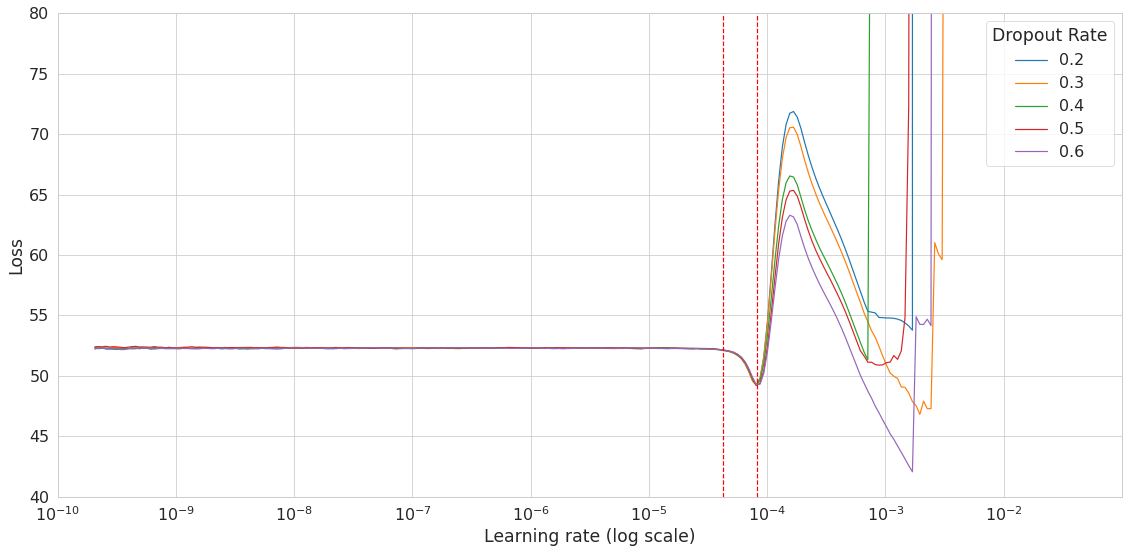

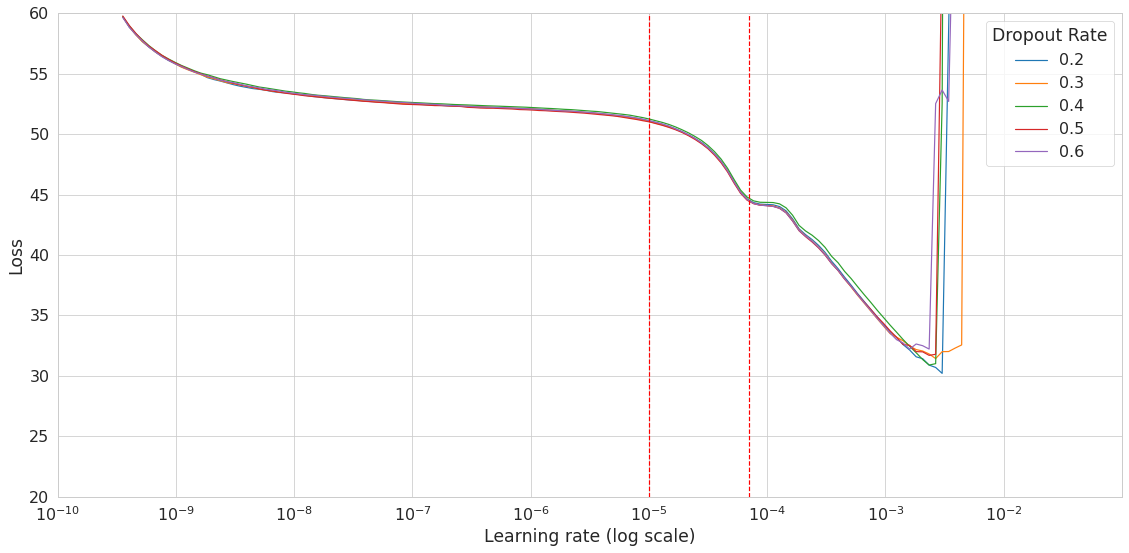

In [93]:
# 0-70
lim = {'RMS': [-4.37,-4.09]}
data = get_files('24-04-2021', 'L')
plot_LR(data, lim, [40, 80], 'L', age='0-70',pt=False, save=True)
# 70-100
lim = {'RMS': [-5,-4.15]}
data = get_files('28-04-2021', 'L')
plot_LR(data, lim, [20, 60], 'L', age='70-100',pt=False, save=True)
# data

0.00019952623149688788 0.00039810717055349735


(<AxesSubplot:>, 0.00019952623149688788, 0.00039479748823588717)

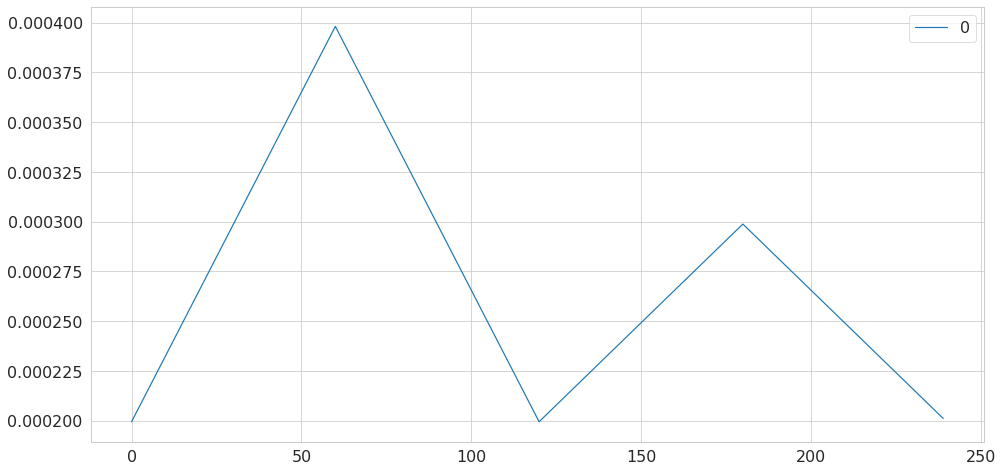

In [67]:
import numpy as np
import pandas as pd
def clr(clr_iterations):
    cycle = np.floor(1+clr_iterations/(2*step_size))
    x = np.abs(clr_iterations/step_size - 2*cycle + 1)
    if scale_mode == 'cycle':
        return base_lr + (max_lr-base_lr) * \
                np.maximum(0, (1-x)) * scale_fn(cycle)
    else:
        return base_lr + (max_lr-base_lr) * \
                np.maximum(0, (1-x)) * scale_fn(clr_iterations)

base_lr = 10**(-3.7)
max_lr = 10**(-3.4)
step_size = 60
mode = 'triangular2'
gamma = 1.
scale_mode = 'cycle'
lrs = []
iterations = []

if mode == 'triangular':
    scale_fn = lambda x: 1.
    scale_mode = 'cycle'
elif mode == 'triangular2':
    scale_fn = lambda x: 1/(2.**(x-1))
    scale_mode = 'cycle'
elif mode == 'exp_range':
    scale_fn = lambda x: gamma**(x)
    scale_mode = 'iterations'

for iter in range(0, 240):
    lrs.append(clr(iter))
print(base_lr, max_lr)
pd.DataFrame(lrs).plot(), np.array(lrs)[0], np.array(lrs)[59]

In [48]:
10**(-4.7), 10**-2.5


(1.9952623149688786e-05, 0.0031622776601683794)